In [111]:
import pandas as pd
from prophet import Prophet
from datetime import datetime, timedelta
message = "Begining dataset cleaning"
print(message)

print('--------------------------------- Begining reading 📖 ---------------------------------')
print('\n')
dataset = pd.read_json('./data/comptage-velo-donnees-compteurs.json')
print('--------------------------------- Reading done ✅ ---------------------------------')
print('\n')
data = pd.DataFrame(dataset).from_dict(dataset)
print('--------------------------------- Begining dataset cleaning 🗑 ---------------------------------')
print('\n')
data


Begining dataset cleaning
--------------------------------- Begining reading 📖 ---------------------------------


--------------------------------- Reading done ✅ ---------------------------------


--------------------------------- Begining dataset cleaning 🗑 ---------------------------------




,datasetid,recordid,fields,geometry,record_timestamp
0,comptage-velo-donnees-compteurs,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
1,comptage-velo-donnees-compteurs,da9f82c7397ded76ccca768ac1de7227f19bb83b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
2,comptage-velo-donnees-compteurs,343bbbe29dc14c67aaf3d82fab5494e9325179c3,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
3,comptage-velo-donnees-compteurs,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
4,comptage-velo-donnees-compteurs,2758a1656d8b58b6a3f676750521c0e4ad07828b,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2021-11-23T08:00:03.265+01:00
...,...,...,...,...,...
950413,comptage-velo-donnees-compteurs,456b49cd4a0db242bc4e415f2075fd0550f45c40,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950414,comptage-velo-donnees-compteurs,e24b85cd2fb73b6beec79444177ddba7962b95e0,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950415,comptage-velo-donnees-compteurs,0f1bd184cd5618677173cefb1398c0905099779e,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00
950416,comptage-velo-donnees-compteurs,bbde2fee1241eabb6d66f01f430af234ea42c364,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.32203, 48....",2021-11-23T08:39:53.355+01:00


In [112]:
dataframe_fields = data['fields']
counter_name_column = []
sum_couts_holrder = []
ids_holder = []
id_compteur_holder = []
names_holder = []
latitude_holder = []
longitude_holder = []
records_dates_holder = []
for index, value in enumerate(dataframe_fields):
    if(index == 10):
        print(value)
    counter_name_column.append(value['nom_compteur'])
    records_dates_holder.append(value['date'])
    sum_couts_holrder.append(value['sum_counts'])
    ids_holder.append(value['id'])
    id_compteur_holder.append(value['id_compteur'])
    names_holder.append(value['name'])
data['nom_compteur'] = counter_name_column
data['counter_update'] = records_dates_holder
data['sum_counts'] = sum_couts_holrder
data['id'] = ids_holder
data['id_compteur'] = id_compteur_holder
data['name'] = names_holder
for index, value in enumerate(data['geometry']):
    if(index == 10):
        print('Debugging')
        print(value['coordinates'])
    longitude_holder.append(value['coordinates'][0])
    latitude_holder.append(value['coordinates'][1])
data['latitude'] = latitude_holder
data['longitude'] = longitude_holder
data.pop('geometry')
data.pop('record_timestamp')
data.pop('fields')
data.pop('datasetid')
print('--------------------------------- Dataset cleaned ✅ ---------------------------------')
print('\n')
data
# data['nom_compteur'].unique()
# print(data.loc[data['fields'] ==
#       'ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b'])
# data.loc(data['nom_compteur' == '97 avenue Denfert Rochereau SO-NE'])


{'url_photos_n1': 'https://www.eco-visio.net/Photos/100003096/https:', 'name': '97 avenue Denfert Rochereau', 'nom_compteur': '97 avenue Denfert Rochereau SO-NE', 'sum_counts': 41.0, 'counter': 'X2H20012081', 'coordinates': [48.83511, 2.33338], 'installation_date': '2012-02-22', 'date': '2020-10-01T18:00:00+02:00', 'id_compteur': '100003096-353242251', 'id': '100003096'}
Debugging
[2.33338, 48.83511]
--------------------------------- Dataset cleaned ✅ ---------------------------------




,recordid,nom_compteur,counter_update,sum_counts,id,id_compteur,name,latitude,longitude
0,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,97 avenue Denfert Rochereau SO-NE,2020-10-01T04:00:00+02:00,0.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
1,da9f82c7397ded76ccca768ac1de7227f19bb83b,97 avenue Denfert Rochereau SO-NE,2020-10-01T03:00:00+02:00,1.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
2,343bbbe29dc14c67aaf3d82fab5494e9325179c3,97 avenue Denfert Rochereau SO-NE,2020-10-01T05:00:00+02:00,2.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
3,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,97 avenue Denfert Rochereau SO-NE,2020-10-01T08:00:00+02:00,42.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
4,2758a1656d8b58b6a3f676750521c0e4ad07828b,97 avenue Denfert Rochereau SO-NE,2020-10-01T13:00:00+02:00,38.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22T14:00:00+01:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22T16:00:00+01:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22T19:00:00+01:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22T22:00:00+01:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


In [113]:
data['counter_update'] = pd.to_datetime(data['counter_update'],utc=True).dt.tz_localize(None)
data


,recordid,nom_compteur,counter_update,sum_counts,id,id_compteur,name,latitude,longitude
0,ef5a8926e5ffa2afe942a22bce813d3b7b5ed91b,97 avenue Denfert Rochereau SO-NE,2020-10-01 02:00:00,0.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
1,da9f82c7397ded76ccca768ac1de7227f19bb83b,97 avenue Denfert Rochereau SO-NE,2020-10-01 01:00:00,1.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
2,343bbbe29dc14c67aaf3d82fab5494e9325179c3,97 avenue Denfert Rochereau SO-NE,2020-10-01 03:00:00,2.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
3,ae6176a583ba76bb82a6176cba4938dc2bcf8f10,97 avenue Denfert Rochereau SO-NE,2020-10-01 06:00:00,42.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
4,2758a1656d8b58b6a3f676750521c0e4ad07828b,97 avenue Denfert Rochereau SO-NE,2020-10-01 11:00:00,38.0,100003096,100003096-353242251,97 avenue Denfert Rochereau,48.83511,2.33338
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22 13:00:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22 15:00:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22 18:00:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22 21:00:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


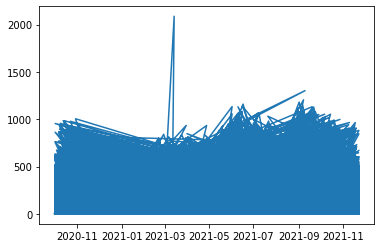

In [114]:
import matplotlib.pyplot as plt
# can save 1,20
fig = plt.figure(facecolor='w')
plt.plot(data.counter_update, data.sum_counts)


In [115]:
cleaned_data = data.drop(data[data.nom_compteur != 'Quai des Tuileries SE-NO'].index)
cleaned_data

,recordid,nom_compteur,counter_update,sum_counts,id,id_compteur,name,latitude,longitude
945362,8d3fee2cd3cb7cd257062dceeef89c0f1fbfbeda,Quai des Tuileries SE-NO,2021-05-18 12:00:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945365,97351f1016ec4c687d842bc3882451892436fbdb,Quai des Tuileries SE-NO,2021-05-18 13:00:00,44.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945368,f4fe5df552f7b2165ffb9f50757574aeef67b38e,Quai des Tuileries SE-NO,2021-05-18 16:00:00,91.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945371,1135e255f05f947791b9c5d49e6310b151ef51c7,Quai des Tuileries SE-NO,2021-05-19 07:00:00,291.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945374,b9219447e7a431e774e4274c69b4514e15534d68,Quai des Tuileries SE-NO,2021-05-19 08:00:00,66.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22 13:00:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22 15:00:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22 18:00:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22 21:00:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


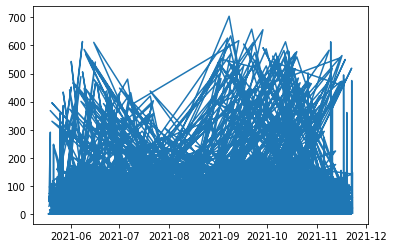

In [116]:
fig2 = plt.figure(facecolor='w')
plt.plot(cleaned_data.counter_update, cleaned_data.sum_counts)

# plt.plot(clcleaned_dtcleanedcleaned_dt.
# counter_update, data.sum_counts)

In [117]:
cleaned_data.rename({"counter_update": "ds", "sum_counts": "y"}, axis='columns', inplace =True) # Renaming column A with 'new_a' and B with 'new_b'
cleaned_data

,recordid,nom_compteur,ds,y,id,id_compteur,name,latitude,longitude
945362,8d3fee2cd3cb7cd257062dceeef89c0f1fbfbeda,Quai des Tuileries SE-NO,2021-05-18 12:00:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945365,97351f1016ec4c687d842bc3882451892436fbdb,Quai des Tuileries SE-NO,2021-05-18 13:00:00,44.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945368,f4fe5df552f7b2165ffb9f50757574aeef67b38e,Quai des Tuileries SE-NO,2021-05-18 16:00:00,91.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945371,1135e255f05f947791b9c5d49e6310b151ef51c7,Quai des Tuileries SE-NO,2021-05-19 07:00:00,291.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
945374,b9219447e7a431e774e4274c69b4514e15534d68,Quai des Tuileries SE-NO,2021-05-19 08:00:00,66.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
...,...,...,...,...,...,...,...,...,...
950413,456b49cd4a0db242bc4e415f2075fd0550f45c40,Quai des Tuileries SE-NO,2021-11-22 13:00:00,53.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950414,e24b85cd2fb73b6beec79444177ddba7962b95e0,Quai des Tuileries SE-NO,2021-11-22 15:00:00,62.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950415,0f1bd184cd5618677173cefb1398c0905099779e,Quai des Tuileries SE-NO,2021-11-22 18:00:00,148.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203
950416,bbde2fee1241eabb6d66f01f430af234ea42c364,Quai des Tuileries SE-NO,2021-11-22 21:00:00,5.0,100056035,100056035-353266460,Quai des Tuileries,48.86357,2.32203


In [118]:
cleaned_data.pop('recordid')
cleaned_data.pop('nom_compteur')
cleaned_data.pop('id')
cleaned_data.pop('id_compteur')
cleaned_data.pop('name')
cleaned_data.pop('latitude')
cleaned_data.pop('longitude')
cleaned_data


,ds,y
945362,2021-05-18 12:00:00,62.0
945365,2021-05-18 13:00:00,44.0
945368,2021-05-18 16:00:00,91.0
945371,2021-05-19 07:00:00,291.0
945374,2021-05-19 08:00:00,66.0
...,...,...
950413,2021-11-22 13:00:00,53.0
950414,2021-11-22 15:00:00,62.0
950415,2021-11-22 18:00:00,148.0
950416,2021-11-22 21:00:00,5.0


In [119]:
m = Prophet()
m.fit(cleaned_data)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -61.911
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8207.71    0.00101898       182.305      0.8858      0.8858      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       8208.16   0.000186634       128.833   1.733e-06       0.001      215  LS failed, Hessian reset 
     192       8208.39   8.11261e-05        62.633   1.155e-06       0.001      327  LS failed, Hessian reset 
     199        8208.4   2.21725e-06       73.7359      0.2862      0.2862      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       8209.06   0.000427913       249.264    2.97e-06       0.001      449  LS failed, Hessian reset 
     299       8209.39   1.81127e-05       63.4513      0.5582      0.5582      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

,ds,yhat,yhat_lower,yhat_upper
4612,2022-02-16 22:00:00,-44.967501,-142.829429,63.301659
4613,2022-02-17 22:00:00,-49.376742,-151.490369,57.106006
4614,2022-02-18 22:00:00,-76.165990,-176.658307,31.284647
4615,2022-02-19 22:00:00,-85.651025,-183.466111,18.622322
4616,2022-02-20 22:00:00,-64.668827,-171.111195,52.305857


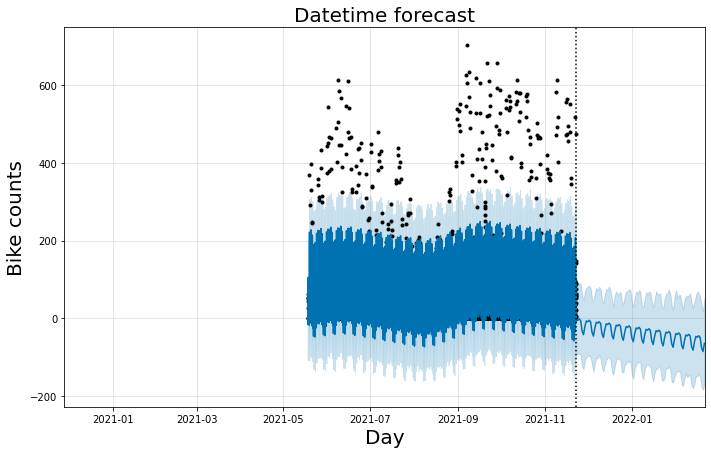

In [120]:
fig3 = m.plot(forecast)
datenow = datetime(2021, 11, 23)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)
plt.xlim([datestart, dateend])
plt.title("Datetime forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Bike counts", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

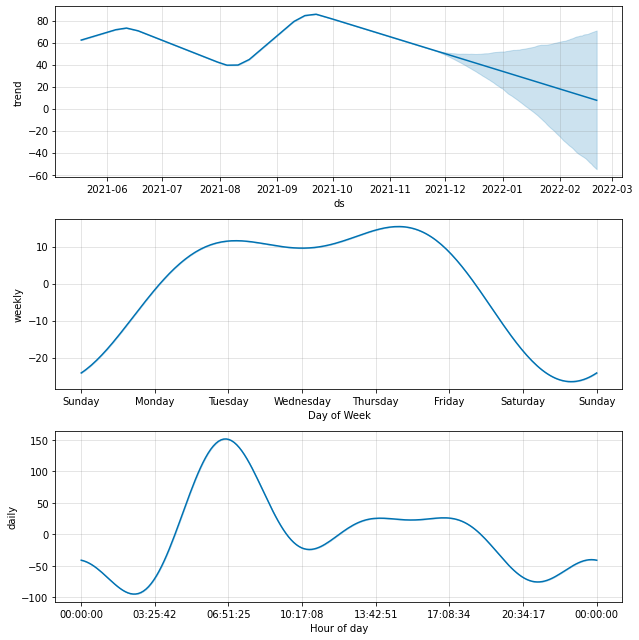

In [121]:
fig4 = m.plot_components(forecast)



In [122]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='3 days')
# print(df_cv)
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:prophet:Making 118 forecasts with cutoffs between 2021-05-28 10:00:00 and 2021-11-19 22:00:00
  0%|          | 0/118 [00:00<?, ?it/s]

Initial log joint probability = -6.28038
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       408.355   1.05127e-07       100.482      0.9026      0.9026      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       408.356   5.66583e-09        99.542      0.3139     0.05868      144   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  1%|          | 1/118 [00:01<02:05,  1.07s/it]

Initial log joint probability = -8.60505
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       471.218   6.52702e-06        96.012      0.3467      0.3467      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176        471.22   2.39853e-08       104.468      0.2627           1      230   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  2%|▏         | 2/118 [00:02<02:05,  1.08s/it]

Initial log joint probability = -7.38574
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       518.613   1.20089e-05       87.4748           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       518.616   1.84841e-05       65.4767   1.987e-07       0.001      198  LS failed, Hessian reset 
     136       518.616   1.02354e-07       76.3569   1.596e-09       0.001      277  LS failed, Hessian reset 
     143       518.616   1.30889e-08       66.0239      0.2011           1      288   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  3%|▎         | 3/118 [00:03<02:05,  1.09s/it]

Initial log joint probability = -8.55906
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       632.498   5.14928e-05       87.9612           1           1      143   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       632.582   0.000144655       73.2149   1.711e-06       0.001      223  LS failed, Hessian reset 
     166       632.587   9.69657e-09       63.0127      0.2514      0.2514      267   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  3%|▎         | 4/118 [00:04<02:02,  1.07s/it]

Initial log joint probability = -7.36466
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       682.202   2.13762e-06       72.2007      0.2391           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       682.203   8.53005e-06       85.5978   1.061e-07       0.001      213  LS failed, Hessian reset 
     157       682.203   3.19861e-08       68.8175      0.1438      0.8219      251   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  4%|▍         | 5/118 [00:05<02:00,  1.07s/it]

Initial log joint probability = -10.2266
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       749.541   0.000221405       85.5738   2.985e-06       0.001      181  LS failed, Hessian reset 
      99       749.549   1.56579e-05       73.3373      0.5818      0.5818      187   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       749.552   8.64003e-09        78.991       0.151       0.151      228   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  5%|▌         | 6/118 [00:06<01:58,  1.06s/it]

Initial log joint probability = -8.91531
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       810.309   0.000140158       87.1028      0.7966      0.7966      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       810.314   2.74489e-08       79.0903      0.3972           1      177   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  6%|▌         | 7/118 [00:07<01:58,  1.07s/it]

Initial log joint probability = -11.7808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       867.221   3.51476e-08         71.56      0.2056           1      124   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  7%|▋         | 8/118 [00:08<01:56,  1.06s/it]

Initial log joint probability = -8.57266
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       952.838    5.5821e-08        80.697      0.3464      0.9044      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       952.838   2.76696e-08       76.2707      0.3918      0.3918      138   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  8%|▊         | 9/118 [00:09<01:54,  1.05s/it]

Initial log joint probability = -12.331
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1012.46   7.76525e-05        87.469           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       1012.48   9.49837e-05       80.7139   9.603e-07       0.001      174  LS failed, Hessian reset 
     156       1012.49   3.70196e-06       94.3472   4.172e-08       0.001      273  LS failed, Hessian reset 
     176       1012.49   6.99025e-08       80.4749      0.9147      0.9147      301   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  8%|▊         | 10/118 [00:10<01:54,  1.06s/it]

Initial log joint probability = -9.67523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1079.18   8.50207e-08       90.7658           1           1      125   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  9%|▉         | 11/118 [00:11<01:53,  1.06s/it]

Initial log joint probability = -13.1271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1147.68   2.32394e-05       69.2286      0.4221      0.4221      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1147.68   1.03533e-05       90.4827   1.393e-07       0.001      228  LS failed, Hessian reset 
     171       1147.68   3.79007e-08       67.3178      0.5277      0.5277      269   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 10%|█         | 12/118 [00:12<01:51,  1.06s/it]

Initial log joint probability = -11.1406
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      58       1185.85   0.000233539       90.5002   2.519e-06       0.001      108  LS failed, Hessian reset 
      96       1185.87   5.03091e-08       81.5031       0.217           1      155   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 11%|█         | 13/118 [00:13<01:50,  1.05s/it]

Initial log joint probability = -15.9786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1245.32   2.79204e-06       80.7647      0.6331      0.6331      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1245.33   1.77589e-05         82.06   2.476e-07       0.001      206  LS failed, Hessian reset 
     168       1245.33   8.15545e-06       81.4081   9.336e-08       0.001      307  LS failed, Hessian reset 
     190       1245.33   3.56205e-08       65.6652      0.3109           1      339   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 12%|█▏        | 14/118 [00:14<01:49,  1.06s/it]

Initial log joint probability = -12.4356
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1308.54   0.000174113       58.3161   2.021e-06       0.001      129  LS failed, Hessian reset 
      93       1308.55   5.59781e-08        59.936      0.1615      0.4898      175   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 13%|█▎        | 15/118 [00:15<01:48,  1.05s/it]

Initial log joint probability = -16.3642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1377.54   2.64593e-07       69.6747      0.1189      0.1189      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       1377.54   1.12868e-05       64.0482   2.078e-07       0.001      206  LS failed, Hessian reset 
     196       1377.55   4.33416e-06       59.8516   6.543e-08       0.001      331  LS failed, Hessian reset 
     199       1377.55   1.41575e-07       49.4203      0.2953      0.2953      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       1377.55   9.24809e-08       58.8271           1           1      354   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 14%|█▎        | 16/118 [00:16<01:48,  1.06s/it]

Initial log joint probability = -14.077
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      38        1439.7   4.04276e-06         57.46    7.22e-08       0.001       97  LS failed, Hessian reset 
      62       1439.72   0.000395035       49.7814   7.568e-06       0.001      167  LS failed, Hessian reset 
      73       1439.73   8.66695e-06       56.3164   1.644e-07       0.001      218  LS failed, Hessian reset 
      93       1439.73   5.65656e-08       51.6344      0.2301           1      246   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 14%|█▍        | 17/118 [00:18<01:46,  1.06s/it]

Initial log joint probability = -17.987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       1507.55   4.10391e-08       47.5103     0.06084           1      134   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 15%|█▌        | 18/118 [00:19<01:46,  1.07s/it]

Initial log joint probability = -14.894
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1567.71   0.000453476       82.5025   4.821e-06       0.001      123  LS failed, Hessian reset 
      99       1567.78    1.7557e-05       64.0309     0.05646           1      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1567.78   1.78107e-05       67.6815   2.827e-07       0.001      233  LS failed, Hessian reset 
     148       1567.79   1.39749e-05       58.2751   1.722e-07       0.001      317  LS failed, Hessian reset 
     157       1567.79   6.72637e-07       53.3249   1.512e-08       0.001      369  LS failed, Hessian reset 
     163       1567.79   5.08139e-08       52.4418      0.3575      0.3575      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 16%|█▌        | 19/118 [00:20<01:46,  1.08s/it]

Initial log joint probability = -19.5547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      52        1644.8    0.00101903       77.2292   1.347e-05       0.001      106  LS failed, Hessian reset 
      93       1644.83   6.75753e-06       61.7386   1.137e-07       0.001      202  LS failed, Hessian reset 
      99       1644.83   1.95155e-08       56.4584      0.1245      0.1245      209   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       1644.83    2.7237e-08       65.9637      0.2684       0.724      224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 17%|█▋        | 20/118 [00:21<01:45,  1.07s/it]

Initial log joint probability = -16.4579
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      51       1703.75   0.000117712       57.5073   1.674e-06       0.001       99  LS failed, Hessian reset 
      69       1703.76   2.89088e-06       54.6421    4.25e-08       0.001      155  LS failed, Hessian reset 
      77       1703.76   2.68284e-08       50.2002      0.1497       0.919      166   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 18%|█▊        | 21/118 [00:22<01:44,  1.08s/it]

Initial log joint probability = -19.6499
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60        1778.9   0.000413592       69.3733   6.574e-06       0.001      108  LS failed, Hessian reset 
      97       1778.93   1.98777e-05       64.9992    2.74e-07       0.001      211  LS failed, Hessian reset 
      99       1778.93   9.21002e-06       49.7089           1           1      213   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       1778.94   1.11267e-07       62.9265      0.6674      0.6674      284   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 19%|█▊        | 22/118 [00:23<01:43,  1.08s/it]

Initial log joint probability = -16.0826
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      42       1853.93    0.00087968       80.6446   1.121e-05       0.001      105  LS failed, Hessian reset 
      99        1854.1   0.000294606       54.6542      0.2969           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1854.17   3.72757e-07        63.662   8.111e-09       0.001      315  LS failed, Hessian reset 
     179       1854.17   9.08202e-08       46.9734      0.5945      0.5945      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 19%|█▉        | 23/118 [00:24<01:42,  1.08s/it]

Initial log joint probability = -20.5788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62       1920.88    0.00102057       74.3891    1.18e-05       0.001      116  LS failed, Hessian reset 
      99       1920.93   4.67014e-07       66.0068      0.9717      0.9717      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       1920.93   7.18943e-08       67.4001      0.2441           1      182   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 20%|██        | 24/118 [00:25<01:41,  1.07s/it]

Initial log joint probability = -18.7744
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       1983.73   1.02237e-05       68.4282   1.599e-07       0.001      149  LS failed, Hessian reset 
      99       1983.73   1.02015e-07       58.3761      0.1728      0.6196      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       1983.73   3.07133e-08       67.9697      0.3281      0.3281      188   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 21%|██        | 25/118 [00:26<01:39,  1.07s/it]

Initial log joint probability = -21.4552
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       2049.28   0.000438853       96.6129   4.759e-06       0.001      120  LS failed, Hessian reset 
      99       2049.33   6.18521e-07       59.6559           1           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2049.33   4.16989e-08       64.7245       0.231           1      181   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 22%|██▏       | 26/118 [00:27<01:38,  1.07s/it]

Initial log joint probability = -18.0584
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2112.54   5.18572e-06       76.3131           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       2112.54   8.10872e-05       71.5322   1.206e-06       0.001      180  LS failed, Hessian reset 
     132       2112.55   2.38108e-07       65.4724           1           1      220   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 23%|██▎       | 27/118 [00:28<01:37,  1.07s/it]

Initial log joint probability = -20.3906
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       2177.51   1.96124e-05       80.8456   2.669e-07       0.001      143  LS failed, Hessian reset 
      99       2177.51    1.6172e-06       61.0135           1           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       2177.52   9.71677e-05       74.9321   1.086e-06       0.001      236  LS failed, Hessian reset 
     165       2177.54   3.65199e-05       54.9267   5.301e-07       0.001      333  LS failed, Hessian reset 
     182       2177.54   1.08916e-07        60.972      0.3582      0.3582      371   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 24%|██▎       | 28/118 [00:29<01:38,  1.09s/it]

Initial log joint probability = -19.3966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       2246.64   0.000289442       77.8055   3.628e-06       0.001      136  LS failed, Hessian reset 
      82       2246.66   9.56616e-06       59.7939   1.605e-07       0.001      200  LS failed, Hessian reset 
      99       2246.67   1.93567e-05       72.9322       1.687       0.429      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2246.74   0.000421618       68.9235           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       2246.74     3.952e-05       68.8694   5.734e-07       0.001      407  LS failed, Hessian reset 
     247       2246.74   4.89577e-07       50.9738   7.081e-09       0.001      504  LS failed, Hessian reset 
     258       2246.74   2.45219e-07       64.5103      0.3399   

 25%|██▍       | 29/118 [00:31<01:39,  1.12s/it]

Initial log joint probability = -23.6729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      58        2318.3   0.000393755       80.1656   2.789e-06       0.001      105  LS failed, Hessian reset 
      99       2318.47   4.56446e-05       63.5677       0.366           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2318.58   1.45719e-05       57.7112      0.3196           1      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       2318.68   0.000185613       66.4957    3.76e-06       0.001      416  LS failed, Hessian reset 
     253       2318.69   1.35063e-05       72.8073   2.604e-07       0.001      498  LS failed, Hessian reset 
     269       2318.69   8.80605e-08        58.772      0.3098           1      528   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 25%|██▌       | 30/118 [00:32<01:41,  1.16s/it]

Initial log joint probability = -22.5329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2385.31   3.03732e-07       56.8714      0.1804           1      146   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2385.31    1.4813e-05       65.1035   1.776e-07       0.001      194  LS failed, Hessian reset 
     140       2385.32   3.91772e-05        87.518   6.177e-07       0.001      279  LS failed, Hessian reset 
     184       2385.33   3.87027e-05       68.1708   4.083e-07       0.001      380  LS failed, Hessian reset 
     199       2385.33   2.78321e-06       64.9935     0.06143           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       2385.33   7.44366e-06       76.1475   9.673e-08       0.001      477  LS failed, Hessian reset 
     275       2385.33   1.52783e-07       62.8425      0.7402   

 26%|██▋       | 31/118 [00:33<01:43,  1.18s/it]

Initial log joint probability = -24.7284
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2461.64   4.52805e-06         76.04      0.2867           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       2461.64   9.34627e-08       74.9126      0.3748      0.3748      156   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 27%|██▋       | 32/118 [00:34<01:38,  1.15s/it]

Initial log joint probability = -19.8385
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2521.38   0.000726997       82.1955           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       2521.48   0.000574389       60.8588   7.435e-06       0.001      176  LS failed, Hessian reset 
     146       2521.52    3.8938e-06       82.1453   5.819e-08       0.001      270  LS failed, Hessian reset 
     160       2521.52   1.10902e-07       59.8156      0.1831      0.7231      287   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 28%|██▊       | 33/118 [00:35<01:36,  1.14s/it]

Initial log joint probability = -24.0293
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      61       2601.05    0.00124935       90.2374   1.622e-05       0.001      117  LS failed, Hessian reset 
      99       2601.14   7.54067e-06        79.802      0.2295      0.7258      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2601.15   0.000108988       83.8209   1.267e-06       0.001      232  LS failed, Hessian reset 
     134       2601.16   1.36446e-07       73.9131           1           1      274   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 29%|██▉       | 34/118 [00:36<01:35,  1.13s/it]

Initial log joint probability = -25.3385
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2660.5   7.38982e-06       70.8669      0.1898           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134        2660.5    2.2394e-07       71.1398           1           1      183   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 30%|██▉       | 35/118 [00:37<01:32,  1.11s/it]

Initial log joint probability = -25.5324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       2730.85   0.000928239       114.263   1.098e-05       0.001      149  LS failed, Hessian reset 
      99       2730.93   2.47022e-05       73.0401      0.3994           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       2730.93   2.62228e-07       67.4832      0.1731           1      217   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 31%|███       | 36/118 [00:39<01:30,  1.10s/it]

Initial log joint probability = -21.3364
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2786.73   2.92084e-05       64.4556      0.4871      0.4871      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2786.81   3.20001e-06       55.9146      0.5272      0.5272      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       2786.81   6.16487e-08       52.3162      0.4233      0.4233      295   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 31%|███▏      | 37/118 [00:40<01:30,  1.11s/it]

Initial log joint probability = -26.2322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      63       2858.62     0.0010694       192.665   1.402e-05       0.001      123  LS failed, Hessian reset 
      99       2858.75   0.000278815       69.2929      0.3457           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       2858.77   3.76253e-06       56.1666   5.766e-08       0.001      296  LS failed, Hessian reset 
     199       2858.77   8.86882e-07       67.4337      0.6894      0.6894      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       2858.94   0.000158341       64.7109   1.563e-06       0.001      496  LS failed, Hessian reset 
     299       2858.95   1.56235e-06       80.6449      0.3478           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 32%|███▏      | 38/118 [00:41<01:34,  1.18s/it]

Initial log joint probability = -21.9238
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91          2930   0.000342049       62.5483   4.516e-06       0.001      168  LS failed, Hessian reset 
      99       2930.01   2.63805e-05       70.7972      0.3158           1      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       2930.07   7.51913e-07       47.6138       0.265      0.8119      236   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 33%|███▎      | 39/118 [00:42<01:31,  1.15s/it]

Initial log joint probability = -27.0521
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      42       2997.55    0.00115083       59.6637   2.122e-05       0.001       94  LS failed, Hessian reset 
      99       2998.84   7.99385e-05       52.6709      0.2789      0.2789      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2999.11    0.00123758       78.7285           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       2999.21   0.000141642       65.3734   1.752e-06       0.001      399  LS failed, Hessian reset 
     285       2999.23   5.61978e-06       69.0807   9.364e-08       0.001      498  LS failed, Hessian reset 
     295       2999.23   1.15337e-07       58.8211      0.2417           1      514   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 34%|███▍      | 40/118 [00:43<01:32,  1.18s/it]

Initial log joint probability = -25.1207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3075.05   5.62699e-06       64.7097           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3075.39   2.03697e-05       71.3181      0.8676      0.8676      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       3075.39   1.13061e-07       66.2241      0.1602      0.6292      273   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 35%|███▍      | 41/118 [00:45<01:29,  1.17s/it]

Initial log joint probability = -27.5656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3153.14   6.10656e-06       51.1058     0.03852           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       3153.43   0.000307721       62.5766   3.579e-06       0.001      272  LS failed, Hessian reset 
     199       3153.45   2.74425e-06       76.7736      0.2573           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3153.46   2.76922e-05       55.1592    3.38e-07       0.001      393  LS failed, Hessian reset 
     262       3153.46    4.9543e-07       74.7936   6.103e-09       0.001      478  LS failed, Hessian reset 
     267       3153.46    1.0761e-07       53.3489      0.2808           1      486   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 36%|███▌      | 42/118 [00:50<03:13,  2.54s/it]

Initial log joint probability = -23.7966
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       3230.38   0.000504784       78.6918   7.645e-06       0.001      156  LS failed, Hessian reset 
      99        3230.4   2.44936e-06       53.7498      0.1958      0.1958      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       3230.62   0.000185777       71.0373   2.062e-06       0.001      291  LS failed, Hessian reset 
     193        3230.7   0.000353502       80.0779   4.249e-06       0.001      375  LS failed, Hessian reset 
     199       3230.71   4.05366e-05       56.1842           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       3230.71   3.30052e-07       53.6401           1           1      452   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 36%|███▋      | 43/118 [00:52<02:44,  2.19s/it]

Initial log joint probability = -27.7823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3302.28   0.000130389       58.2166           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       3302.37   0.000454322       64.3201   6.515e-06       0.001      216  LS failed, Hessian reset 
     159       3302.39   1.31904e-07       56.8923      0.2007           1      281   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 37%|███▋      | 44/118 [00:53<02:19,  1.88s/it]

Initial log joint probability = -25.2821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       3373.78   0.000626134       100.152   9.804e-06       0.001      158  LS failed, Hessian reset 
      99       3373.88   0.000107324       65.2002           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3374.03   8.73708e-05       50.1851      0.4809      0.9099      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       3374.03   8.67818e-06       42.9568   1.729e-07       0.001      335  LS failed, Hessian reset 
     225       3374.03   4.44685e-07       50.0394      0.3698           1      374   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 38%|███▊      | 45/118 [00:54<02:02,  1.67s/it]

Initial log joint probability = -28.7416
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3453.57   0.000132524       68.7569   2.356e-06       0.001      170  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3453.95   7.60722e-05       73.0349           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       3453.98   0.000142317       77.7335   1.806e-06       0.001      366  LS failed, Hessian reset 
     240       3453.99   7.63136e-06       59.8419     1.1e-07       0.001      443  LS failed, Hessian reset 
     259       3453.99   1.92815e-07       48.1112      0.6379      0.6379      469   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 39%|███▉      | 46/118 [00:55<01:51,  1.55s/it]

Initial log joint probability = -23.5464
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3532.41   1.41445e-05       46.4971           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       3532.43   8.73007e-05       60.7511   1.188e-06       0.001      204  LS failed, Hessian reset 
     165       3532.44   1.97535e-07       51.8966      0.3048           1      250   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 40%|███▉      | 47/118 [00:56<01:41,  1.43s/it]

Initial log joint probability = -28.6806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       3611.64   0.000303367       108.907    2.18e-06       0.001      133  LS failed, Hessian reset 
      99       3612.06   4.02963e-06       59.1551      0.2724           1      183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       3612.26    0.00161751       107.246   2.058e-05       0.001      304  LS failed, Hessian reset 
     199       3612.34   2.79316e-05        82.095      0.9194      0.9194      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       3612.34   3.20119e-05       53.4102   4.825e-07       0.001      423  LS failed, Hessian reset 
     217       3612.34   3.95871e-07       51.7504   7.573e-09       0.001      479  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relati

 41%|████      | 48/118 [00:58<01:36,  1.38s/it]

Initial log joint probability = -24.4691
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3679.29   0.000201258       74.4638      0.8784      0.8784      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       3679.49   0.000300213       125.702    2.94e-06       0.001      195  LS failed, Hessian reset 
     185        3679.6   2.89412e-05       73.4857   4.577e-07       0.001      327  LS failed, Hessian reset 
     199        3679.6   3.58329e-07       58.1908           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220        3679.6   9.74237e-08       81.3012      0.3423      0.3423      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 42%|████▏     | 49/118 [00:59<01:31,  1.33s/it]

Initial log joint probability = -29.5442
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       3758.36    0.00232566       123.513   2.688e-05       0.001      131  LS failed, Hessian reset 
      99       3758.93   0.000402979       56.8608           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       3758.95   6.17806e-05       75.0883   9.722e-07       0.001      228  LS failed, Hessian reset 
     136       3758.96   3.51324e-07       52.1133      0.1649           1      250   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 42%|████▏     | 50/118 [01:00<01:26,  1.27s/it]

Initial log joint probability = -25.9155
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3839.1    0.00182463       70.1827           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       3839.12   0.000327774         100.9   4.811e-06       0.001      183  LS failed, Hessian reset 
     199       3839.19   0.000348211       70.0465           1           1      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3839.27   2.72116e-05        67.489           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       3839.31   8.62284e-07       56.6312      0.2503           1      539   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 43%|████▎     | 51/118 [01:01<01:26,  1.29s/it]

Initial log joint probability = -28.1754
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3921.61   7.36762e-05       57.9902      0.3293      0.3293      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       3921.62   3.02615e-07       52.7038      0.2142      0.7207      178   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 44%|████▍     | 52/118 [01:02<01:22,  1.24s/it]

Initial log joint probability = -24.9333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       3994.61   0.000835362       147.557    1.08e-05       0.001      147  LS failed, Hessian reset 
      99       3994.72   0.000113553       64.3363           1           1      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       3995.16   0.000276137       119.388   3.749e-06       0.001      367  LS failed, Hessian reset 
     199       3995.18   0.000310912       95.4416           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       3995.23   8.20462e-05       61.8659   1.026e-06       0.001      470  LS failed, Hessian reset 
     265       3995.23    3.6443e-07       74.0998           1           1      515   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 45%|████▍     | 53/118 [01:04<01:22,  1.27s/it]

Initial log joint probability = -28.9914
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4067.11   0.000120957       55.1273           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       4067.46   0.000186358       87.3999   2.204e-06       0.001      280  LS failed, Hessian reset 
     199       4067.47   1.65369e-05       68.3136           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       4067.51   0.000153532       86.7017   1.751e-06       0.001      344  LS failed, Hessian reset 
     252       4067.54   3.00305e-07       63.0373      0.1936           1      400   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 46%|████▌     | 54/118 [01:05<01:21,  1.27s/it]

Initial log joint probability = -25.9923
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4147.28   0.000204843       90.9555      0.3353           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       4147.76   1.08421e-06       57.9473   1.701e-08       0.001      313  LS failed, Hessian reset 
     197       4147.76   3.96678e-07       58.7988      0.1992           1      316   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 47%|████▋     | 55/118 [01:06<01:18,  1.25s/it]

Initial log joint probability = -30.3865
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4230.31   0.000702078       73.2571      0.6895      0.6895      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       4230.39    1.5572e-05        67.938   1.879e-07       0.001      243  LS failed, Hessian reset 
     184       4230.39   3.04747e-07       80.6229      0.9118      0.9118      276   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 47%|████▋     | 56/118 [01:07<01:16,  1.23s/it]

Initial log joint probability = -25.8536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       4311.62   0.000205494       78.8446   2.445e-06       0.001      144  LS failed, Hessian reset 
      99       4311.66   6.12015e-05       55.8199      0.7956      0.7956      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       4311.67   4.53361e-05        78.464   5.886e-07       0.001      223  LS failed, Hessian reset 
     142       4311.67   1.85076e-07       69.3467      0.4806      0.4806      259   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 48%|████▊     | 57/118 [01:09<01:14,  1.22s/it]

Initial log joint probability = -30.5472
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4385.65   0.000297265        42.167           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       4385.85   0.000237973       89.0705   3.116e-06       0.001      223  LS failed, Hessian reset 
     199       4385.93     2.933e-06       47.6299      0.7849      0.7849      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       4385.94   2.54801e-05       72.0264   3.436e-07       0.001      327  LS failed, Hessian reset 
     224       4385.94   1.04489e-07       55.8476      0.2906      0.9662      344   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 49%|████▉     | 58/118 [01:10<01:13,  1.22s/it]

Initial log joint probability = -29.3733
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4454.41   0.000473033       54.2467      0.8419      0.8419      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       4454.92   0.000168802       52.3993   3.985e-06       0.001      284  LS failed, Hessian reset 
     199       4454.94   4.17075e-05       53.3897      0.2892           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       4455.03   4.77221e-07       53.9832      0.8883      0.8883      394   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 50%|█████     | 59/118 [01:11<01:13,  1.24s/it]

Initial log joint probability = -30.8273
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4530.29    0.00282456       210.584      0.8629      0.8629      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4531.38   1.05061e-05       79.3712           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     298       4531.61   3.03732e-07       71.1721      0.2944           1      365   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 51%|█████     | 60/118 [01:12<01:12,  1.25s/it]

Initial log joint probability = -26.6349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4597.58   1.81061e-05        54.304       0.708       0.708      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120        4597.7    0.00031089       152.268   2.679e-06       0.001      191  LS failed, Hessian reset 
     130       4597.75   7.28082e-06       61.3958   1.699e-07       0.001      237  LS failed, Hessian reset 
     199       4597.85   0.000461908       89.5636           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210          4598   0.000203915       97.6137   2.919e-06       0.001      402  LS failed, Hessian reset 
     299       4598.11   2.02084e-07       65.7495     0.02726      0.9195      515   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 52%|█████▏    | 61/118 [01:14<01:13,  1.29s/it]

Initial log joint probability = -31.7426
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4678.13   0.000872153       71.7237       0.423       0.423      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157        4679.1   0.000288437       131.192    3.95e-06       0.001      231  LS failed, Hessian reset 
     195       4679.21   9.38792e-05       55.0355   1.122e-06       0.001      318  LS failed, Hessian reset 
     199       4679.21   9.84094e-06       33.2017           1           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     268       4679.25   5.22948e-05       88.4711   7.534e-07       0.001      461  LS failed, Hessian reset 
     299       4679.26   9.27883e-07       61.8486      0.7926     0.07926      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 53%|█████▎    | 62/118 [01:15<01:13,  1.31s/it]

Initial log joint probability = -26.258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4746.6      0.001118       133.234      0.7456      0.7456      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       4746.78   4.20467e-05       61.3388   8.091e-07       0.001      231  LS failed, Hessian reset 
     199       4746.78   5.96738e-07       39.9424   1.309e-08       0.001      358  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 53%|█████▎    | 63/118 [01:16<01:11,  1.30s/it]

Initial log joint probability = -32.4357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4810.74    0.00175695       76.6823           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       4810.92   0.000376973       170.323   4.034e-06       0.001      181  LS failed, Hessian reset 
     118       4810.98   8.81876e-05       55.7394   1.715e-06       0.001      224  LS failed, Hessian reset 
     194       4811.13   0.000122936       80.0426   1.629e-06       0.001      385  LS failed, Hessian reset 
     199       4811.13   3.64346e-05       64.4096           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       4811.13   8.78801e-06       90.3379    1.39e-07       0.001      491  LS failed, Hessian reset 
     256       4811.14   2.96953e-07       45.5271           1   

 54%|█████▍    | 64/118 [01:18<01:11,  1.32s/it]

Initial log joint probability = -27.7508
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       4816.02   0.000208743       88.8493   1.216e-06       0.001      126  LS failed, Hessian reset 
      99       4816.43   3.56397e-05       63.5513           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       4816.66   8.59141e-05       62.6384   1.745e-06       0.001      278  LS failed, Hessian reset 
     199        4816.7   2.07716e-05        68.242           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       4816.72   4.54839e-08       59.8645     0.05241           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 55%|█████▌    | 65/118 [01:19<01:09,  1.32s/it]

Initial log joint probability = -34.4258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          4865    0.00343206        303.57           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       4865.96   3.42923e-05       67.6102   5.421e-07       0.001      288  LS failed, Hessian reset 
     199       4865.96   3.04277e-06       73.2375      0.4012           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       4865.96   2.37005e-05       84.6604   3.126e-07       0.001      369  LS failed, Hessian reset 
     243       4865.97   4.20229e-07       68.3334      0.9926      0.9926      397   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 56%|█████▌    | 66/118 [01:20<01:08,  1.32s/it]

Initial log joint probability = -28.9741
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4924.47   0.000264229       70.3065      0.2542           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       4924.51   0.000425576       96.7715   6.902e-06       0.001      181  LS failed, Hessian reset 
     135       4924.54   4.69989e-05       71.7997   9.515e-07       0.001      256  LS failed, Hessian reset 
     199        4924.8    0.00756853       100.271           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       4925.12   0.000325252       119.804   1.086e-06       0.001      389  LS failed, Hessian reset 
     249       4925.31   4.95136e-05        77.325   7.258e-07       0.001      506  LS failed, Hessian reset 
     276       4925.32   1.66376e-07       56.9269        0.27   

 57%|█████▋    | 67/118 [01:22<01:08,  1.35s/it]

Initial log joint probability = -35.3113
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       4995.76   0.000193766       72.2283   1.095e-06       0.001      180  LS failed, Hessian reset 
      99        4995.8   0.000761583        74.608          10           1      182   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          4997    0.00257645        82.976           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       4997.06   0.000187383       88.3216   2.704e-06       0.001      338  LS failed, Hessian reset 
     299       4997.28   1.88478e-06       71.5081      0.3831           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       4997.29   6.64678e-06       87.1049    9.82e-08       0.001      528  LS failed, Hessian rese

 58%|█████▊    | 68/118 [01:23<01:08,  1.38s/it]

Initial log joint probability = -24.1043
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5339.31   0.000908892       105.024      0.7912      0.7912      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5340.15   0.000206946       91.9555   8.643e-07       0.001      242  LS failed, Hessian reset 
     199       5340.56   8.27573e-06       63.6908      0.3502      0.3502      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5340.57   5.50991e-05        70.388   7.239e-07       0.001      371  LS failed, Hessian reset 
     249       5340.57   4.46239e-07       43.8274           1           1      405   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 58%|█████▊    | 69/118 [01:25<01:06,  1.36s/it]

Initial log joint probability = -30.2185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       5380.35   0.000175183       111.188   1.427e-06       0.001      164  LS failed, Hessian reset 
      99        5380.4   0.000357746       69.9048      0.8435      0.8435      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5381.5   7.59697e-05       93.3125      0.7792      0.7792      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210        5381.5   4.04484e-05       83.5215   6.087e-07       0.001      360  LS failed, Hessian reset 
     299       5381.55   4.44196e-05       81.7184      0.7585      0.7585      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       5381.67   0.000122737       80.7946   9.164e-07       0.001      591  LS failed, Hessian rese

 59%|█████▉    | 70/118 [01:26<01:09,  1.44s/it]

Initial log joint probability = -25.1084
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5433.09    0.00481856       217.321      0.5531           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105        5433.3   0.000324084       147.505   4.124e-06       0.001      174  LS failed, Hessian reset 
     181       5433.82   4.66057e-05       49.6156   6.927e-07       0.001      308  LS failed, Hessian reset 
     199       5433.82   3.66972e-06       83.7237      0.3031      0.3031      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5433.84   0.000111206       76.3268   2.658e-06       0.001      413  LS failed, Hessian reset 
     279       5433.84   4.04664e-06       59.7004   5.228e-08       0.001      515  LS failed, Hessian reset 
     287       5433.84   2.37401e-07       52.4677      0.1995   

 60%|██████    | 71/118 [01:28<01:07,  1.44s/it]

Initial log joint probability = -30.2374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5506.22     0.0014978       85.8427      0.9603      0.9603      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185          5507   2.31603e-07       48.2971      0.6795      0.6795      244   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 61%|██████    | 72/118 [01:29<01:03,  1.37s/it]

Initial log joint probability = -25.8841
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5544.35    0.00973989       178.104           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       5544.95   0.000760803       131.618   8.671e-06       0.001      237  LS failed, Hessian reset 
     199       5545.01   1.19415e-05       77.6943      0.5356      0.5356      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5545.07   8.59427e-05       76.5833   9.755e-07       0.001      382  LS failed, Hessian reset 
     299       5545.09   0.000198657        82.285      0.9889      0.9889      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306        5545.1   4.29279e-05       65.7297    7.39e-07       0.001      512  LS failed, Hessian rese

 62%|██████▏   | 73/118 [01:30<01:03,  1.41s/it]

Initial log joint probability = -33.3492
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5613.22   0.000760039       78.1462           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5614.15   0.000125692       87.5488   1.169e-06       0.001      228  LS failed, Hessian reset 
     192       5614.35   2.06585e-05       83.4293    3.26e-07       0.001      340  LS failed, Hessian reset 
     199       5614.35   8.59695e-06       53.7751       4.924      0.4924      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5614.37   0.000146152       88.7432   1.145e-06       0.001      490  LS failed, Hessian reset 
     299       5614.38   6.39411e-06       53.2192       1.649      0.5234      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 63%|██████▎   | 74/118 [01:32<01:03,  1.45s/it]

Initial log joint probability = -27.3482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5649.07   0.000403176       113.608      0.5186     0.05186      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5649.41   8.14428e-07       68.5466      0.4684      0.4684      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5649.41   4.17827e-07       73.4867     0.07993           1      296   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 64%|██████▎   | 75/118 [01:33<01:00,  1.40s/it]

Initial log joint probability = -33.7808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5716.18   0.000717143       113.661      0.3878      0.6129      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5716.45   0.000613338       183.969   1.054e-05       0.001      201  LS failed, Hessian reset 
     157       5716.63   0.000111845        93.707   1.558e-06       0.001      293  LS failed, Hessian reset 
     199       5716.64   1.42014e-05       56.8815      0.6588      0.6588      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286        5716.9   0.000363125       112.179   6.084e-06       0.001      538  LS failed, Hessian reset 
     299       5716.95   5.41128e-05       67.6948      0.6112      0.6112      552   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 64%|██████▍   | 76/118 [01:35<01:01,  1.47s/it]

Initial log joint probability = -65.7248
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5770.27      0.011776       163.321           1           1      143   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5770.72   0.000137082       89.0444   1.173e-06       0.001      230  LS failed, Hessian reset 
     165       5770.78   0.000152809       87.2157   2.364e-06       0.001      319  LS failed, Hessian reset 
     199       5770.79    1.9346e-07       65.4157      0.2874     0.02874      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       5770.79   5.17849e-07       60.7749       1.378      0.1378      381   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 65%|██████▌   | 77/118 [01:36<00:58,  1.43s/it]

Initial log joint probability = -36.0597
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5803.26   0.000609474       134.802           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       5803.63   0.000143751       66.2347   2.014e-06       0.001      313  LS failed, Hessian reset 
     199       5803.64   4.77748e-05       84.2992      0.7767      0.7767      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5803.91    0.00523402       81.1114           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5804.18    0.00130652        71.244           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     442        5804.3   7.04013e-05    

 66%|██████▌   | 78/118 [01:38<00:59,  1.50s/it]

Initial log joint probability = -29.3353
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5819.75   0.000121075       186.572      0.3729      0.3729      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5819.82    5.3242e-05       53.0056    7.75e-07       0.001      240  LS failed, Hessian reset 
     169       5819.82   3.49243e-07        55.204      0.2669           1      277   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 67%|██████▋   | 79/118 [01:39<00:55,  1.42s/it]

Initial log joint probability = -38.0104
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5871.74   4.22437e-05       84.0601    0.009975           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       5871.87   0.000503121       63.0304   7.428e-06       0.001      212  LS failed, Hessian reset 
     189       5872.17   0.000180527       102.833   3.042e-06       0.001      345  LS failed, Hessian reset 
     199       5872.19   0.000130857       81.3403      0.2592           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5872.23   7.36425e-07       65.3039      0.2644           1      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 68%|██████▊   | 80/118 [01:41<00:53,  1.42s/it]

Initial log joint probability = -31.1371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       5933.24   0.000438695       173.485   4.608e-06       0.001      148  LS failed, Hessian reset 
      99        5933.5     0.0017888       157.516           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       5933.96   0.000107367       65.0317   9.998e-07       0.001      306  LS failed, Hessian reset 
     199       5933.98   8.11786e-05       65.7329      0.7266      0.7266      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226          5934   8.87189e-07       52.4051           1           1      363   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 69%|██████▊   | 81/118 [01:42<00:51,  1.40s/it]

Initial log joint probability = -39.6184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6000.05   0.000640709       65.2054           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6001.03    0.00022636       77.0796      0.9855      0.9855      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       6001.25    0.00116673       88.9165   9.511e-06       0.001      355  LS failed, Hessian reset 
     274       6001.33   0.000155485        74.175   2.002e-06       0.001      468  LS failed, Hessian reset 
     290       6001.33   7.81696e-07       52.5941   1.488e-08       0.001      531  LS failed, Hessian reset 
     291       6001.33   2.31908e-07       44.0432      0.3042           1      533   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 69%|██████▉   | 82/118 [01:43<00:51,  1.43s/it]

Initial log joint probability = -31.5969
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       6025.98   0.000143004       74.1918   9.818e-07       0.001      126  LS failed, Hessian reset 
      99       6026.22   9.82904e-05       58.8132      0.6696      0.6696      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       6026.58   0.000200034       94.8501   9.333e-07       0.001      219  LS failed, Hessian reset 
     199          6027   0.000152894       110.063    0.003216           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       6027.22   0.000102549       72.2632   1.822e-06       0.001      427  LS failed, Hessian reset 
     241       6027.22   1.08442e-07       68.2399     0.06354           1      453   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 70%|███████   | 83/118 [01:48<01:23,  2.40s/it]

Initial log joint probability = -41.6429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6086.86   0.000171093        70.097      0.8654      0.8654      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115          6087   0.000150208       81.5202   9.428e-07       0.001      199  LS failed, Hessian reset 
     178       6087.54   0.000320401       150.646    4.37e-06       0.001      320  LS failed, Hessian reset 
     199       6087.68   1.96501e-05       76.3496      0.4631      0.4631      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218        6087.7     0.0001624       108.466   1.653e-06       0.001      402  LS failed, Hessian reset 
     299       6087.73   0.000116589        71.445      0.6383      0.6383      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 71%|███████   | 84/118 [01:50<01:13,  2.15s/it]

Initial log joint probability = -33.1078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       6134.75    0.00018659       106.889    1.13e-06       0.001      133  LS failed, Hessian reset 
      99       6135.03   0.000671589       86.7865      0.6131      0.6131      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       6135.39   0.000233312       147.018   2.118e-06       0.001      216  LS failed, Hessian reset 
     180       6136.17    0.00123428       170.528   1.339e-05       0.001      344  LS failed, Hessian reset 
     199        6136.3    6.8763e-05       64.4688           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6136.46   1.99446e-06       48.7525           1           1      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 72%|███████▏  | 85/118 [01:51<01:04,  1.96s/it]

Initial log joint probability = -42.4123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6203.32   9.81089e-05       56.0914      0.4399      0.4399      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175        6204.9   0.000678347       178.462   7.366e-06       0.001      247  LS failed, Hessian reset 
     192       6204.92   1.22922e-05       53.4714   1.931e-07       0.001      310  LS failed, Hessian reset 
     199       6204.92   1.88611e-06       60.8736      0.4145      0.4145      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282          6205   0.000142731        88.034   1.815e-06       0.001      495  LS failed, Hessian reset 
     299       6205.02   0.000350987       62.1691           1           1      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 73%|███████▎  | 86/118 [01:53<00:59,  1.84s/it]

Initial log joint probability = -33.8271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6245.28    0.00123671       96.3078      0.7911      0.7911      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6245.84   7.51381e-06       71.3436      0.3116           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6246.13    0.00088686       69.9663      0.3405           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       6246.48   0.000279899       98.5777   8.236e-07       0.001      437  LS failed, Hessian reset 
     348       6246.75    2.8536e-05       55.2042   4.309e-07       0.001      529  LS failed, Hessian reset 
     369       6246.75   5.61832e-07        55.153      0.2697           1      556   
Optimization terminat

 74%|███████▎  | 87/118 [01:55<00:56,  1.83s/it]

Initial log joint probability = -44.2571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6312.71   0.000843881       81.3449       1.198      0.1198      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138        6313.4     0.0011766        227.76   8.005e-06       0.001      214  LS failed, Hessian reset 
     199       6313.67   3.67803e-06       85.2113      0.0903      0.8523      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       6313.67   6.34108e-07       51.7364           1           1      311   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 75%|███████▍  | 88/118 [01:56<00:53,  1.78s/it]

Initial log joint probability = -34.9098
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6344.84     0.0427049        126.66           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       6344.88   0.000403668       171.975   3.508e-06       0.001      164  LS failed, Hessian reset 
     181       6345.47    0.00010948       83.2826   1.621e-06       0.001      327  LS failed, Hessian reset 
     199       6345.47   5.36603e-06       67.8387           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       6345.47   2.15647e-07       71.1766       0.676       0.676      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 75%|███████▌  | 89/118 [01:58<00:51,  1.79s/it]

Initial log joint probability = -46.0325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6416.85    0.00178442       107.845           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       6417.21   0.000280871       163.702   1.781e-06       0.001      166  LS failed, Hessian reset 
     143       6417.63   0.000279858       150.402   3.249e-06       0.001      240  LS failed, Hessian reset 
     173       6417.73   2.91922e-05        58.334    5.11e-07       0.001      318  LS failed, Hessian reset 
     183       6417.73   9.33115e-06       44.9697   1.723e-07       0.001      374  LS failed, Hessian reset 
     199       6417.73   2.48932e-06       58.8611      0.2551           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       6417.73   5.33888e-07       52.7223      0.8894   

 76%|███████▋  | 90/118 [02:00<00:52,  1.87s/it]

Initial log joint probability = -36.4784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6482.37    0.00252517       81.1928           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       6483.27   0.000167844       82.3218   8.575e-07       0.001      266  LS failed, Hessian reset 
     192       6483.51   2.15733e-05       58.6251   3.389e-07       0.001      354  LS failed, Hessian reset 
     199       6483.51   3.92649e-06       51.9632       0.972       0.972      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       6483.55   2.78716e-05       57.5184   5.203e-07       0.001      443  LS failed, Hessian reset 
     271       6483.58   4.35503e-07       40.5105           1           1      502   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 77%|███████▋  | 91/118 [02:02<00:50,  1.88s/it]

Initial log joint probability = -47.3352
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6534.15   0.000531304       96.9025      0.5352      0.5352      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       6535.17   0.000153575       97.9904   1.301e-06       0.001      226  LS failed, Hessian reset 
     182        6535.3   9.83063e-06       72.8431   1.797e-07       0.001      308  LS failed, Hessian reset 
     195        6535.3   1.98256e-07       62.1091      0.1417           1      331   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 78%|███████▊  | 92/118 [02:04<00:46,  1.79s/it]

Initial log joint probability = -37.9931
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96        6563.1   0.000450731       193.671   5.222e-06       0.001      188  LS failed, Hessian reset 
      99       6563.17    0.00077959       140.506           1           1      191   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       6563.91   1.54228e-05        68.933   3.072e-07       0.001      352  LS failed, Hessian reset 
     199       6563.91   1.42628e-05       50.7392      0.4578      0.4578      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6563.94    7.2882e-05       88.0354           1           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6564.31   0.000461857       39.4526           1           1      622   
    Iter      log pro

 79%|███████▉  | 93/118 [02:05<00:46,  1.84s/it]

Initial log joint probability = -48.7469
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6619.94   0.000871632       120.841           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       6620.64   0.000204335        127.13    1.95e-06       0.001      172  LS failed, Hessian reset 
     160       6620.96   0.000224391       41.6334   3.963e-06       0.001      280  LS failed, Hessian reset 
     197       6620.98   4.14425e-06       77.1456   7.248e-08       0.001      367  LS failed, Hessian reset 
     199       6620.98   1.64907e-06        44.545      0.6688      0.6688      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       6620.98   7.08053e-08       44.8563     0.03013           1      375   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 80%|███████▉  | 94/118 [02:07<00:41,  1.73s/it]

Initial log joint probability = -37.8784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6686.72     0.0019609       159.446      0.9135      0.9135      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       6686.84   0.000126121       76.1964   9.928e-07       0.001      174  LS failed, Hessian reset 
     151       6687.11   0.000450511       89.9862   5.659e-06       0.001      270  LS failed, Hessian reset 
     199       6687.16   1.08768e-06       50.5657      0.6605      0.6605      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       6687.16   6.36902e-07       64.5437           1           1      358   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 81%|████████  | 95/118 [02:08<00:37,  1.63s/it]

Initial log joint probability = -48.8618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6755.66    0.00124949       92.3234           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6756.58   0.000201629        74.279           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       6756.82   0.000594223       215.389   8.966e-06       0.001      373  LS failed, Hessian reset 
     299       6756.92   4.62281e-06       53.9702     0.04102           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       6756.92   4.21656e-07       47.0647      0.5826      0.5826      444   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 81%|████████▏ | 96/118 [02:10<00:35,  1.63s/it]

Initial log joint probability = -39.3844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94        6787.4   0.000368366       171.342    4.72e-06       0.001      164  LS failed, Hessian reset 
      99       6787.63    0.00132473       184.071      0.6811      0.6811      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6788.21    2.7289e-05        70.318           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       6788.21   1.43237e-06       57.8462           1           1      327   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 82%|████████▏ | 97/118 [02:11<00:33,  1.59s/it]

Initial log joint probability = -52.2865
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6856.34   0.000789256       89.4888      0.4846           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       6856.67    0.00152375       346.704   1.702e-05       0.001      187  LS failed, Hessian reset 
     191       6856.85   3.03764e-07       60.7137      0.3548           1      290   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 83%|████████▎ | 98/118 [02:13<00:30,  1.54s/it]

Initial log joint probability = -40.2835
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6913.26   0.000888272       99.6144           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6913.99   0.000244398       57.4201           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6914.34    0.00761887         101.4           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       6914.56   0.000135309       93.0892   1.104e-06       0.001      481  LS failed, Hessian reset 
     367       6914.62   8.54119e-05       61.4053   1.418e-06       0.001      547  LS failed, Hessian reset 
     398       6914.62   8.40238e-07       75.0606      0.1936           1      589   
Optimization terminat

 84%|████████▍ | 99/118 [02:15<00:31,  1.68s/it]

Initial log joint probability = -52.4568
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6986.05    0.00709537       136.395       0.951       0.951      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       6987.49   0.000191299       93.8089   2.981e-06       0.001      245  LS failed, Hessian reset 
     196       6987.53   0.000114137       69.7641   1.847e-06       0.001      320  LS failed, Hessian reset 
     199       6987.53    2.9469e-05       51.1857           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       6987.54   4.26819e-07       63.2763     0.07618           1      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 85%|████████▍ | 100/118 [02:17<00:30,  1.69s/it]

Initial log joint probability = -44.9519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7053.48    0.00110377        69.231       2.995           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       7053.95   0.000150867       88.1211   8.611e-07       0.001      218  LS failed, Hessian reset 
     199        7054.5    0.00282142       72.3674           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       7054.62   0.000166873       121.216   1.625e-06       0.001      368  LS failed, Hessian reset 
     287       7055.19   7.58318e-05       83.6295   8.389e-07       0.001      498  LS failed, Hessian reset 
     299        7055.2   2.64466e-06       56.4772      0.2698      0.2698      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

 86%|████████▌ | 101/118 [02:18<00:29,  1.71s/it]

Initial log joint probability = -53.9385
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7117.82    0.00140054       69.5148      0.4008           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7119.41    2.8869e-05       73.3897      0.2701           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7119.66   0.000526458       69.1838           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       7119.76   0.000279112       101.419   4.696e-06       0.001      437  LS failed, Hessian reset 
     344       7119.79   3.66535e-07       62.9183      0.3749           1      481   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 86%|████████▋ | 102/118 [02:20<00:26,  1.69s/it]

Initial log joint probability = -41.6748
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7175.96   0.000989999       99.5926      0.6305      0.6305      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7177.07   0.000184886       131.078      0.2734      0.2734      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       7177.68   5.53263e-06       64.9661   9.194e-08       0.001      402  LS failed, Hessian reset 
     294       7177.68   2.73112e-07       56.3874      0.3303           1      421   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 87%|████████▋ | 103/118 [02:22<00:26,  1.77s/it]

Initial log joint probability = -55.3886
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7255.35     0.0010052       298.657      0.3041      0.6692      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       7257.22   0.000773503       279.627   5.083e-06       0.001      259  LS failed, Hessian reset 
     199       7257.43    0.00098648       86.1848      0.2411           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       7257.53   8.32521e-07       37.7959      0.2698      0.9457      354   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 88%|████████▊ | 104/118 [02:23<00:23,  1.66s/it]

Initial log joint probability = -43.223
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7315.57   0.000334337       112.277           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7316.92     0.0184204       256.823           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       7317.03   0.000141449       91.1584   9.251e-07       0.001      305  LS failed, Hessian reset 
     299       7317.46   9.78415e-07       57.3261           1           1      435   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 89%|████████▉ | 105/118 [02:25<00:22,  1.70s/it]

Initial log joint probability = -55.7273
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7383.28    0.00517225        86.009           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       7384.51   0.000232535       107.704   7.628e-07       0.001      239  LS failed, Hessian reset 
     199       7384.96   3.56062e-07       52.8296      0.1276      0.1276      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       7384.97   5.53769e-07       53.5743      0.2662           1      320   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 90%|████████▉ | 106/118 [02:27<00:19,  1.63s/it]

Initial log joint probability = -44.0626
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7441.3   0.000289244       104.272           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       7442.05   0.000184481       132.876   1.704e-06       0.001      203  LS failed, Hessian reset 
     181       7442.85    0.00064793       118.819   6.349e-06       0.001      292  LS failed, Hessian reset 
     199       7442.93   5.10586e-05       62.3069     0.04623           1      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229          7443   0.000117118          72.5   8.785e-07       0.001      392  LS failed, Hessian reset 
     273       7443.03   3.69493e-05       76.2073   5.508e-07       0.001      492  LS failed, Hessian reset 
     299       7443.03   2.55371e-06       61.8252           1   

 91%|█████████ | 107/118 [02:29<00:20,  1.90s/it]

Initial log joint probability = -56.2366
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7510.82    0.00174036       69.9157      0.3115           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       7513.09   0.000481271       142.795   6.562e-06       0.001      282  LS failed, Hessian reset 
     199       7513.21    2.4428e-05       58.7727           1           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       7513.22   2.70285e-05       56.3496   5.329e-07       0.001      376  LS failed, Hessian reset 
     245       7513.22   6.15631e-07       66.5569      0.6327      0.6327      418   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 92%|█████████▏| 108/118 [02:31<00:18,  1.86s/it]

Initial log joint probability = -43.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92          7579   0.000327812       163.919   2.761e-06       0.001      152  LS failed, Hessian reset 
      99       7579.11    0.00246081       69.6438           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       7580.11   0.000266575       178.667   1.865e-06       0.001      269  LS failed, Hessian reset 
     199        7580.5   8.66821e-05       73.2198      0.5916      0.5916      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       7580.89   0.000163139       107.774   8.374e-07       0.001      458  LS failed, Hessian reset 
     299       7581.11   0.000104273        81.788      0.2374           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

 92%|█████████▏| 109/118 [02:33<00:17,  2.00s/it]

Initial log joint probability = -56.0546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7649.52    0.00853158       156.511       8.588      0.8588      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       7650.72   0.000128462       95.7176   1.351e-06       0.001      223  LS failed, Hessian reset 
     199       7651.36   7.20201e-06       59.5983      0.9105      0.9105      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7651.48   1.62739e-06       68.1869     0.05977           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       7651.48   6.43217e-07         55.86           1           1      479   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 93%|█████████▎| 110/118 [02:35<00:15,  1.99s/it]

Initial log joint probability = -46.4117
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7670.97    0.00194001       148.262      0.5056      0.5056      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7672.93   9.54498e-05       46.0356      0.7429      0.7429      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       7673.21   0.000141051       102.858   1.157e-06       0.001      348  LS failed, Hessian reset 
     294       7673.33   7.01445e-06       56.6848   1.007e-07       0.001      463  LS failed, Hessian reset 
     299       7673.33   1.47496e-06       42.0823      0.1813           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       7673.33   3.83659e-07       51.3829      0.5456      0.5456      479   
Optimization terminat

 94%|█████████▍| 111/118 [02:37<00:13,  1.96s/it]

Initial log joint probability = -57.7001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7732.49    0.00934882       346.746           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7735.61    0.00164104       66.4925           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       7735.77    0.00022614       80.7468   3.126e-06       0.001      315  LS failed, Hessian reset 
     299       7735.82   1.76256e-05       72.1193           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7736.36   0.000357874       69.5237       3.164      0.3164      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405        7736.4   0.000238521    

 95%|█████████▍| 112/118 [02:39<00:12,  2.08s/it]

Initial log joint probability = -46.1621
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7800.35    0.00158425        210.73           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       7800.77   0.000642932       126.199   5.333e-06       0.001      177  LS failed, Hessian reset 
     144       7801.47   0.000150425       104.064   8.673e-07       0.001      267  LS failed, Hessian reset 
     199       7801.95    0.00343214       99.9969      0.2049           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       7802.22   3.82367e-05       55.3222   5.183e-07       0.001      484  LS failed, Hessian reset 
     295       7802.22   7.22273e-07       54.3595       0.195           1      507   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 96%|█████████▌| 113/118 [02:42<00:10,  2.11s/it]

Initial log joint probability = -58.4904
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7872.61    0.00192036       178.954           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       7875.54    8.1272e-05       60.4141   9.261e-07       0.001      244  LS failed, Hessian reset 
     199       7875.59   1.40934e-05       54.4926      0.7187      0.7187      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206        7875.6   0.000133511       95.7743   1.447e-06       0.001      347  LS failed, Hessian reset 
     224       7875.62   6.99637e-07       57.6027       0.566       0.566      369   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 97%|█████████▋| 114/118 [02:43<00:08,  2.01s/it]

Initial log joint probability = -50.1714
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7920.56    0.00240103       157.112       1.133      0.1133      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183        7922.6   0.000232769       73.4211    4.43e-06       0.001      290  LS failed, Hessian reset 
     199       7922.64   8.03872e-05       63.3013           1           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       7922.65   5.33505e-07       44.9373     0.07399           1      367   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 97%|█████████▋| 115/118 [02:45<00:05,  1.97s/it]

Initial log joint probability = -59.7575
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.73     0.0037214       364.115           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       7977.29    0.00129232       107.306   1.818e-05       0.001      213  LS failed, Hessian reset 
     188       7977.46   0.000112626       80.2518   1.209e-06       0.001      316  LS failed, Hessian reset 
     199       7977.47    1.2681e-05       69.6851      0.6514      0.6514      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       7977.47    2.1078e-05        65.302   3.035e-07       0.001      401  LS failed, Hessian reset 
     235       7977.47   8.34625e-08       46.2818     0.06948           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

 98%|█████████▊| 116/118 [02:47<00:03,  1.90s/it]

Initial log joint probability = -48.8486
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8013.85   0.000877702        92.866           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       8015.23   0.000186895       126.826   1.619e-06       0.001      273  LS failed, Hessian reset 
     199       8015.37   3.89169e-05       65.5898       0.871      0.2008      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       8015.49   1.51697e-05        62.013   2.393e-07       0.001      439  LS failed, Hessian reset 
     286       8015.49   5.51472e-07       54.8768      0.8071      0.8071      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 99%|█████████▉| 117/118 [02:49<00:01,  1.88s/it]

Initial log joint probability = -61.548
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8085.18     0.0061366       90.8349      0.6935      0.6935      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       8085.96   0.000175063       84.5501   7.116e-07       0.001      224  LS failed, Hessian reset 
     198       8086.36   0.000105195       92.0821   1.133e-06       0.001      339  LS failed, Hessian reset 
     199       8086.36   3.74393e-05       71.9756           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8087.07     0.0011479       84.7067       0.739       0.739      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       8087.11   0.000100647       68.2185   1.161e-06       0.001      544  LS failed, Hessian reset

100%|██████████| 118/118 [02:51<00:00,  1.46s/it]
INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,0 days 08:00:00,4956.263598,70.400736,44.704339,0.755989,1.013420,0.895660
1,0 days 09:00:00,7224.454370,84.996790,54.015278,0.697527,0.958952,0.839582
2,0 days 10:00:00,7727.448784,87.905909,57.094790,0.690897,0.923841,0.815107
3,0 days 11:00:00,7627.693302,87.336666,56.428152,0.670238,0.895954,0.816284
4,0 days 12:00:00,7570.798503,87.010336,56.030157,0.689593,0.894046,0.815795


INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

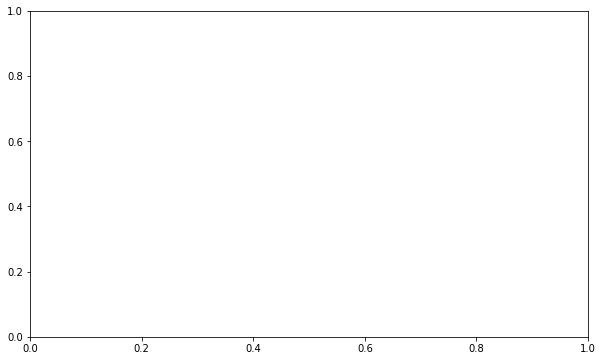

In [123]:
from prophet.plot import plot_cross_validation_metric
fig10 = plot_cross_validation_metric(df_cv, metric='mape')